In [16]:
import pandas as pd
dataframe = pd.read_csv('data.csv')

In [18]:
dataframe.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,...,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,1044.000000,196650.022499,27.255625,78.050742,80.147918,1863.332216,1.754907,3.207276,2.912877,15.173289,...,57.460249,72.595785,56.013889,55.968391,52.779215,17.141762,16.842433,16.505747,16.961207,17.182471
std,603.186676,30282.055558,3.866145,3.290284,4.135475,249.678839,0.806021,0.724916,0.958463,13.315600,...,17.224868,8.041961,22.109548,24.396913,24.779325,20.405896,19.537822,18.419848,19.967173,20.746554
min,0.000000,41.000000,17.000000,74.000000,74.000000,1043.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,20.000000,7.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,522.000000,184789.000000,24.000000,76.000000,77.000000,1804.000000,1.000000,3.000000,2.000000,7.000000,...,47.000000,69.000000,37.000000,33.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1044.000000,200752.000000,27.000000,77.000000,80.000000,1928.000000,2.000000,3.000000,3.000000,12.000000,...,61.000000,74.000000,65.000000,68.000000,62.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1566.000000,215089.000000,30.000000,80.000000,83.000000,2022.000000,2.000000,4.000000,4.000000,20.000000,...,70.000000,78.000000,75.000000,77.000000,75.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,2088.000000,246069.000000,41.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [20]:
dataframe.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [2086, 233738, 'Zubeldia', ..., 10.0, 13.0, '€18.4M'],
       [2087, 189707, 'Da Costa', ..., 75.0, 75.0, '€3.9M'],
       [2088, 176652, 'D. Kolář', ..., nan, nan, nan]], dtype=object)

In [40]:
df1 = pd.DataFrame(dataframe, columns = ['Name', 'Wage', 'Value'])

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
    
wage = df1['Wage'].replace('[\€]', '', regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€]', '', regex=True).apply(value_to_float)

df1['Wage'] = wage
df1['Value'] = value
df1['difference'] = df1['Value']-df1['Wage']
df1.sort_values('difference', ascending = False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
953,Luís Neto,0.0,0.0,0.0
568,A. Lunev,0.0,0.0,0.0
677,I. Smolnikov,0.0,0.0,0.0
1352,B. Dzsudzsák,0.0,0.0,0.0


<Axes: xlabel='Wage', ylabel='Value'>

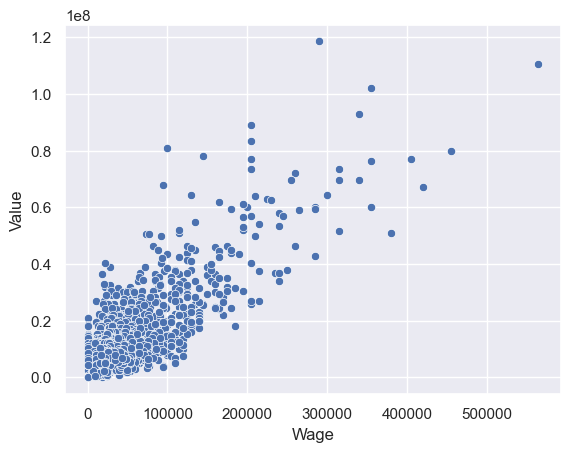

In [44]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [62]:
from bokeh.plotting import figure, show 
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ('Name', '@Name')]
)

p = figure(title='Football', x_axis_label = 'Wage', y_axis_label = 'Value', tools = [TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)